In [1]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import csv

import utils

In [2]:
models_folder = 'saved_models'
model_name = '20201007_setnetcond'
results_folder = 'saved_results'

In [3]:
all_train_losses = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'all_train_losses.npy')), allow_pickle=True)
all_train_correct = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'all_train_correct.npy')), allow_pickle=True)
best_train_results = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'best_train_results.npy')), allow_pickle=True)

all_val_losses = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'all_val_losses.npy')), allow_pickle=True)
all_val_correct = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'all_val_correct.npy')), allow_pickle=True)
best_val_results = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'best_val_results.npy')), allow_pickle=True)

all_test_losses = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'all_test_losses.npy')), allow_pickle=True)
all_test_correct = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'all_test_correct.npy')), allow_pickle=True)
best_test_results = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'best_test_results.npy')), allow_pickle=True)

fx_labels = np.load(file=('%s/%s/%s' % (results_folder, model_name, 'fx_labels.npy')))

In [7]:
train_set_size = best_train_results.shape[0]
val_set_size = best_val_results.shape[0]
test_set_size = best_test_results.shape[0]

In [8]:
# BEST RESULTS
print('Best Train Accuracy: ', 100 * max(all_train_correct) / train_set_size)
print('Epoch: ', np.argmax(all_train_correct))
print()
print('Best Val Accuracy: ', 100 * max(all_val_correct) / val_set_size)
print('Epoch: ', np.argmax(all_val_correct))
print()
print('Best Test Accuracy: ', 100 * max(all_test_correct) / test_set_size)
print('Epoch: ', np.argmax(all_test_correct))
print()

Best Train Accuracy:  83.76447400837645
Epoch:  49

Best Val Accuracy:  75.90029818793485
Epoch:  49

Best Test Accuracy:  76.13615511652088
Epoch:  49



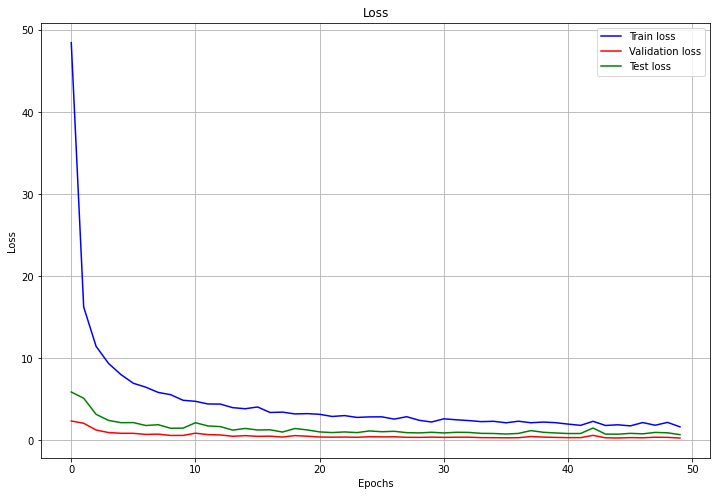

In [9]:
# LOSS
epochs = range(0, len(all_train_losses))
plt.figure(figsize=(12,8))
plt.grid(b=None, which='major', axis='both')
plt.plot(epochs, all_train_losses, 'b', label='Train loss')
plt.plot(epochs, all_val_losses, 'r', label='Validation loss')
plt.plot(epochs, all_test_losses, 'g', label='Test loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

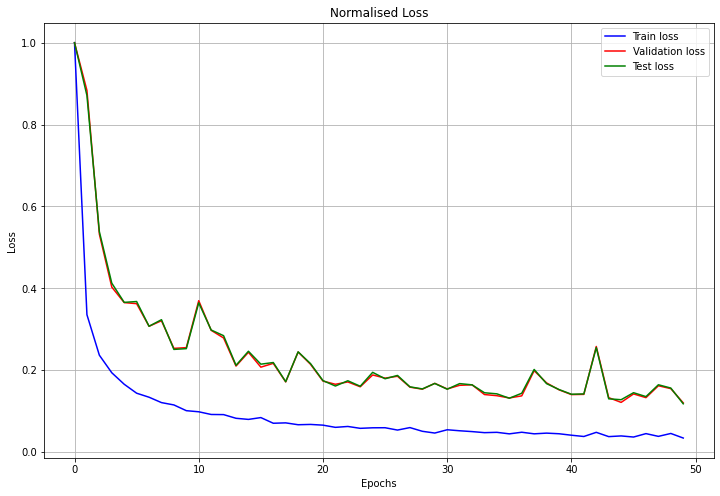

In [10]:
# NORMALISED LOSS
epochs = range(0, len(all_train_losses))
plt.figure(figsize=(12,8))
plt.grid(b=None, which='major', axis='both')
plt.plot(epochs, np.array(all_train_losses) / max(all_train_losses), 'b', label='Train loss')
plt.plot(epochs, np.array(all_val_losses) / max(all_val_losses), 'r', label='Validation loss')
plt.plot(epochs, np.array(all_test_losses) / max(all_test_losses), 'g', label='Test loss')
plt.title('Normalised Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

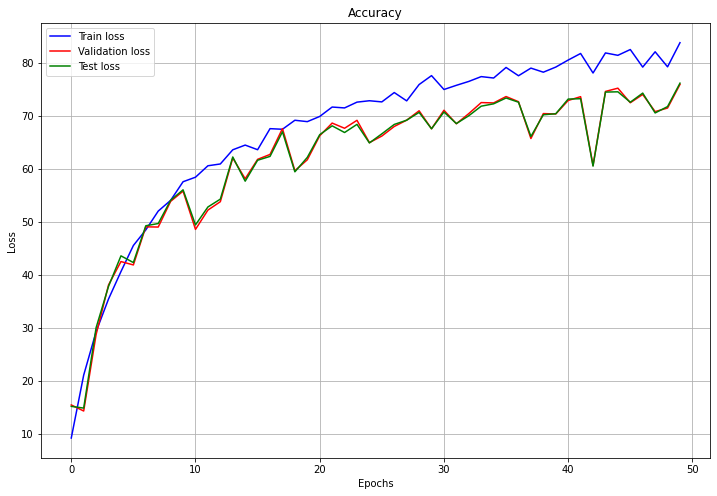

In [11]:
# ACCURACY
all_train_perc_correct = 100 * np.array(all_train_correct) / train_set_size
all_val_perc_correct = 100 * np.array(all_val_correct) / val_set_size
all_test_perc_correct = 100 * np.array(all_test_correct) / test_set_size
epochs = range(0, len(all_train_losses))
plt.figure(figsize=(12,8))
plt.grid(b=None, which='major', axis='both')
plt.plot(epochs, all_train_perc_correct, 'b', label='Train loss')
plt.plot(epochs, all_val_perc_correct, 'r', label='Validation loss')
plt.plot(epochs, all_test_perc_correct, 'g', label='Test loss')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# Find best performance epoch based on validation
# Extract results from training and test for that epoch
best_val = 100 * max(all_val_correct) / val_set_size
best_val_idx = np.argmax(all_val_correct)

print("Best Validation Accuracy: ",best_val, "at epoch ", best_val_idx)
print("Training Accuracy: ", 100 * all_train_correct[best_val_idx] / train_set_size)
print("Test Accuracy: ", 100 * all_test_correct[best_val_idx] / test_set_size)

Best Validation Accuracy:  48.29879960241609 at epoch  47
Training Accuracy:  53.21082991394177
Test Accuracy:  48.039635451709586


In [13]:
# extract vectors for dataframe
train_indexes = best_train_results[:, 0]
train_filenames = best_train_results[:, 1] 
train_preds = np.stack(best_train_results[:, 2])
train_targets = np.stack(best_train_results[:, 3])
train_abs_err = np.stack(abs(train_preds - train_targets))

val_indexes = best_val_results[:, 0]
val_filenames = best_val_results[:, 1] 
val_preds = np.stack(best_val_results[:, 2])
val_targets = np.stack(best_val_results[:, 3])
val_abs_err = np.stack(abs(val_preds - val_targets))

test_indexes = best_test_results[:, 0]
test_filenames = best_test_results[:, 1] 
test_preds = np.stack(best_test_results[:, 2])
test_targets = np.stack(best_test_results[:, 3])
test_abs_err = np.stack(abs(test_preds - test_targets))

In [23]:
# dataframes
train_df = pd.DataFrame(data={'index': train_indexes, 'filename': train_filenames,
                                'level_pred': train_preds[:,0], 'gain_pred': train_preds[:,1],
                                'tone_eq1_pred': train_preds[:,2], 'tone_eq2_pred': train_preds[:,3],
                                'tone_eq3_pred': train_preds[:,4], 'tone_eq4_pred': train_preds[:,5],
                                'level_targ': train_targets[:,0], 'gain_targ': train_targets[:,1],
                                'tone_eq1_targ': train_targets[:,2], 'tone_eq2_targ': train_targets[:,3],
                                'tone_eq3_targ': train_targets[:,4], 'tone_eq4_targ': train_targets[:,5],
                                'level_abs': train_abs_err[:,0], 'gain_abs': train_abs_err[:,1],
                                'tone_eq1_abs': train_abs_err[:,2], 'tone_eq2_abs': train_abs_err[:,3],
                                'tone_eq3_abs': train_abs_err[:,4], 'tone_eq4_abs': train_abs_err[:,5]})

val_df = pd.DataFrame(data={'index': val_indexes, 'filename': val_filenames,
                                'level_pred': val_preds[:,0], 'gain_pred': val_preds[:,1],
                                'tone_eq1_pred': val_preds[:,2], 'tone_eq2_pred': val_preds[:,3],
                                'tone_eq3_pred': val_preds[:,4], 'tone_eq4_pred': val_preds[:,5],
                                'level_targ': val_targets[:,0], 'gain_targ': val_targets[:,1],
                                'tone_eq1_targ': val_targets[:,2], 'tone_eq2_targ': val_targets[:,3],
                                'tone_eq3_targ': val_targets[:,4], 'tone_eq4_targ': val_targets[:,5],
                                'level_abs': val_abs_err[:,0], 'gain_abs': val_abs_err[:,1],
                                'tone_eq1_abs': val_abs_err[:,2], 'tone_eq2_abs': val_abs_err[:,3],
                                'tone_eq3_abs': val_abs_err[:,4], 'tone_eq4_abs': val_abs_err[:,5]})

test_df = pd.DataFrame(data={'index': test_indexes, 'filename': test_filenames,
                                'level_pred': test_preds[:,0], 'gain_pred': test_preds[:,1],
                                'tone_eq1_pred': test_preds[:,2], 'tone_eq2_pred': test_preds[:,3],
                                'tone_eq3_pred': test_preds[:,4], 'tone_eq4_pred': test_preds[:,5],
                                'level_targ': test_targets[:,0], 'gain_targ': test_targets[:,1],
                                'tone_eq1_targ': test_targets[:,2], 'tone_eq2_targ': test_targets[:,3],
                                'tone_eq3_targ': test_targets[:,4], 'tone_eq4_targ': test_targets[:,5],
                                'level_abs': test_abs_err[:,0], 'gain_abs': test_abs_err[:,1],
                                'tone_eq1_abs': test_abs_err[:,2], 'tone_eq2_abs': test_abs_err[:,3],
                                'tone_eq3_abs': test_abs_err[:,4], 'tone_eq4_abs': test_abs_err[:,5]})

In [24]:
test_df

,index,filename,level_pred,gain_pred,tone_eq1_pred,tone_eq2_pred,tone_eq3_pred,tone_eq4_pred,level_targ,gain_targ,tone_eq1_targ,tone_eq2_targ,tone_eq3_targ,tone_eq4_targ,level_abs,gain_abs,tone_eq1_abs,tone_eq2_abs,tone_eq3_abs,tone_eq4_abs
0,87240,G91-46201-MT2-G10B0T0ML10MF0-21075,1.001,0.862,-0.020,0.011,0.994,0.008,1.0,1.0,0.0,0.0,1.0,0.0,0.001,0.138,0.020,0.011,0.006,0.008
1,147836,G61-71512-SD1-D8T10-20657,1.000,0.826,0.955,-1.004,-1.005,-1.004,1.0,0.8,1.0,-1.0,-1.0,-1.0,0.000,0.026,0.045,0.004,0.005,0.004
2,79719,G71-60405-MT2-G10B0T0ML10MF10-20793,1.000,1.009,-0.030,0.017,0.979,0.994,1.0,1.0,0.0,0.0,1.0,1.0,0.000,0.009,0.030,0.017,0.021,0.006
3,109732,G83-52207-OD1-D10-21003,1.000,1.024,-1.015,-1.000,-1.006,-0.999,1.0,1.0,-1.0,-1.0,-1.0,-1.0,0.000,0.024,0.015,0.000,0.006,0.001
4,434,G73-56306-808-O2T8-20859,1.000,0.183,0.887,-1.003,-1.005,-1.003,1.0,0.2,0.8,-1.0,-1.0,-1.0,0.000,0.017,0.087,0.003,0.005,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32693,68489,G73-62312-MT2-G8B0T0ML0MF0-20865,1.000,0.926,-0.030,0.008,-0.013,0.005,1.0,0.8,0.0,0.0,0.0,0.0,0.000,0.126,0.030,0.008,0.013,0.005
32694,11849,G91-52207-808-O10T0-21081,1.000,0.906,-0.018,-1.002,-1.005,-1.003,1.0,1.0,0.0,-1.0,-1.0,-1.0,0.000,0.094,0.018,0.002,0.005,0.003
32695,4430,G63-61502-808-O2T8-20725,1.000,0.176,0.686,-1.001,-1.005,-1.001,1.0,0.2,0.8,-1.0,-1.0,-1.0,0.000,0.024,0.114,0.001,0.005,0.001
32696,145332,G73-65410-SD1-D5T0-20876,1.000,0.531,-0.018,-1.004,-1.006,-1.003,1.0,0.5,0.0,-1.0,-1.0,-1.0,0.000,0.031,0.018,0.004,0.006,0.003


In [26]:
# Mean Absolute Errors
level_mae = sum(test_df.level_abs)/test_set_size
gain_mae = sum(test_df.gain_abs)/test_set_size
tone_eq1_mae = sum(test_df.tone_eq1_abs)/test_set_size
tone_eq2_mae = sum(test_df.tone_eq2_abs)/test_set_size
tone_eq3_mae = sum(test_df.tone_eq3_abs)/test_set_size
tone_eq4_mae = sum(test_df.tone_eq4_abs)/test_set_size
print('level_mae: ', level_mae)
print('gain_mae: ', gain_mae)
print('tone_eq1_mae: ', tone_eq1_mae)
print('tone_eq2_mae: ', tone_eq2_mae)
print('tone_eq3_mae: ', tone_eq3_mae)
print('tone_eq4_mae: ', tone_eq4_mae)

level_mae:  0.0005258733642612424
gain_mae:  0.04370833040630408
tone_eq1_mae:  0.047125267868133286
tone_eq2_mae:  0.006932718043268522
tone_eq3_mae:  0.006807419132984501
tone_eq4_mae:  0.008370359203620642


<AxesSubplot:xlabel='gain_pred'>

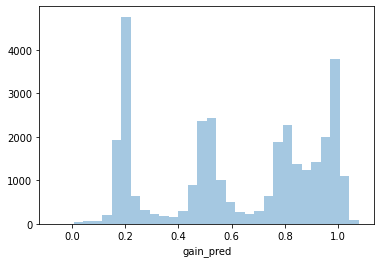

In [27]:
sns.distplot(test_df.gain_pred, kde=False, hist=True, rug=False)

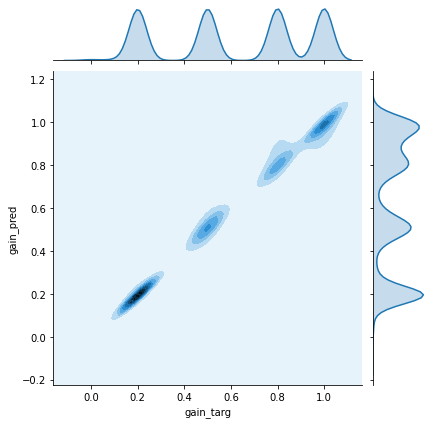

In [28]:
sns.jointplot(x='gain_targ', y='gain_pred', data=test_df, kind='kde');

In [19]:
# SAVE RESULTS for best epoch

# write train results to csv file
train_results_sorted = all_train_results[best_val_idx].tolist()
for i in range(len(train_results_sorted)):
    train_results_sorted[i][0] = int(train_results_sorted[i][0])
train_results_sorted = sorted(train_results_sorted)
with open('%s/%s/%s' % (results_folder, model_name, 'train_setnet_results.csv'), mode='w') as file:
    wrt = csv.writer(file)
    wrt.writerow(['index','filename','prediction','settings'])
    for row in train_results_sorted:
        wrt.writerow(row)

# write validation results to csv file
val_results_sorted = all_val_results[best_val_idx].tolist()
for i in range(len(val_results_sorted)):
    val_results_sorted[i][0] = int(val_results_sorted[i][0])
val_results_sorted = sorted(val_results_sorted)
with open('%s/%s/%s' % (results_folder, model_name, 'val_setnet_results.csv'), mode='w') as file:
    wrt = csv.writer(file)
    wrt.writerow(['index','filename','prediction','settings'])
    for row in val_results_sorted:
        wrt.writerow(row)

# write test results to csv file
test_results_sorted = all_test_results[best_val_idx].tolist()
for i in range(len(test_results_sorted)):
    test_results_sorted[i][0] = int(test_results_sorted[i][0])
test_results_sorted = sorted(test_results_sorted)
with open('%s/%s/%s' % (results_folder, model_name, 'test_setnet_results.csv'), mode='w') as file:
    wrt = csv.writer(file)
    wrt.writerow(['index','filename','prediction','settings'])
    for row in test_results_sorted:
        wrt.writerow(row)